In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import custom
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt

In [3]:
sentences = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
    'seoul is korea capital', 
    'bejing is china capital',
    'tokyo is japan capital',
]

In [4]:
word_dict, number_dict = custom.make_dict(sentences)
corpus = custom.word_num_encoding(sentences, word_dict)
comatrix = custom.make_comatrix(corpus, len(word_dict), window_size=2)

print(word_dict)
print(corpus)
print(comatrix)

{'<eos>': 0, '<unk>': 1, 'he': 2, 'is': 3, 'a': 4, 'king': 5, 'she': 6, 'queen': 7, 'man': 8, 'woman': 9, 'warsaw': 10, 'poland': 11, 'capital': 12, 'berlin': 13, 'germany': 14, 'paris': 15, 'france': 16, 'seoul': 17, 'korea': 18, 'bejing': 19, 'china': 20, 'tokyo': 21, 'japan': 22}
[[ 2  3  4  5]
 [ 6  3  4  7]
 [ 2  3  4  8]
 [ 6  3  4  9]
 [10  3 11 12]
 [13  3 14 12]
 [15  3 16 12]
 [17  3 18 12]
 [19  3 20 12]
 [21  3 22 12]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 4. 1. 2. 1. 1. 1. 1. 1. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 2. 4. 0. 1. 2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
word_pair = []

for i in range(comatrix.shape[0]) :
    for j in range(comatrix.shape[1]) :
        num = int(comatrix[i,j])
        for k in range(num) :
            word_pair.append([i, j])

print(word_pair)

[[2, 3], [2, 3], [2, 4], [2, 4], [3, 2], [3, 2], [3, 4], [3, 4], [3, 4], [3, 4], [3, 5], [3, 6], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 12], [3, 12], [3, 12], [3, 12], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [3, 21], [3, 22], [4, 2], [4, 2], [4, 3], [4, 3], [4, 3], [4, 3], [4, 5], [4, 6], [4, 6], [4, 7], [4, 8], [4, 9], [5, 3], [5, 4], [6, 3], [6, 3], [6, 4], [6, 4], [7, 3], [7, 4], [8, 3], [8, 4], [9, 3], [9, 4], [10, 3], [10, 11], [11, 3], [11, 10], [11, 12], [12, 3], [12, 3], [12, 3], [12, 3], [12, 3], [12, 3], [12, 11], [12, 14], [12, 16], [12, 18], [12, 20], [12, 22], [13, 3], [13, 14], [14, 3], [14, 12], [14, 13], [15, 3], [15, 16], [16, 3], [16, 12], [16, 15], [17, 3], [17, 18], [18, 3], [18, 12], [18, 17], [19, 3], [19, 20], [20, 3], [20, 12], [20, 19], [21, 3], [21, 22], [22, 3], [22, 12], [22, 21]]


In [7]:
x = []
t = []
for data in word_pair :
    x.append(numpy.eye(len(word_dict))[data[0]])
    t.append(data[1])

x = numpy.array(x)
print(x)
print(t)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[3, 3, 4, 4, 2, 2, 4, 4, 4, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 12, 12, 12, 12, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2, 2, 3, 3, 3, 3, 5, 6, 6, 7, 8, 9, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 11, 3, 10, 12, 3, 3, 3, 3, 3, 3, 11, 14, 16, 18, 20, 22, 3, 14, 3, 12, 13, 3, 16, 3, 12, 15, 3, 18, 3, 12, 17, 3, 20, 3, 12, 19, 3, 22, 3, 12, 21]


In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NN(nn.Module) :
    def __init__(self, word_size) :
        super().__init__();
        self.f = nn.Linear(word_size, 2, device = device)
        self.g = nn.Linear(2, word_size, device = device)
    def forward(self, x) :
        y = self.f(x)
        y = self.g(y)
        return y

tensor_x = torch.tensor(x, dtype = torch.float, device = device)
tensor_t = torch.tensor(t, dtype = torch.long,  device = device)

F = NN(len(word_dict))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(F.parameters(), lr = 1)
epoch = 500

for e in range(epoch) :
    tensor_y = F(tensor_x)

    loss = loss_function(tensor_y, tensor_t)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (e+1) % 100 == 0 :
        print("epoch {} | loss {}".format(e+1, loss))

epoch 100 | loss 2.2109251022338867
epoch 200 | loss 2.070112705230713
epoch 300 | loss 2.076995611190796
epoch 400 | loss 2.0714635848999023
epoch 500 | loss 2.0731253623962402


In [15]:
vector = F.state_dict()['g.weight'] + F.state_dict()['g.bias'].reshape(-1,1)
vector = vector.numpy()
vector_df = pandas.DataFrame(vector, columns = ['x', 'y'])
vector_df['word'] = word_dict.keys()

print(vector_df)

           x         y     word
0  -2.929725 -2.444229    <eos>
1  -2.777325 -2.382798    <unk>
2  -1.535702  0.018655       he
3   1.247253  2.267263       is
4   2.920441 -1.542228        a
5  -1.864932 -0.384295     king
6  -1.550121  0.007724      she
7  -1.816897 -0.348720    queen
8  -1.921145 -0.425958      man
9  -1.941291 -0.440937    woman
10  1.321509 -0.130057   warsaw
11  0.664536  1.174350   poland
12  3.098100  1.700108  capital
13  1.169340  0.167110   berlin
14  0.713847  1.170844  germany
15  1.308472 -0.090653    paris
16  0.740523  1.167873   france
17  1.090121  0.251986    seoul
18  0.701929  1.162407    korea
19  1.209712  0.109321   bejing
20  0.644589  1.170971    china
21  1.252544  0.033068    tokyo
22  0.884083  1.135302    japan


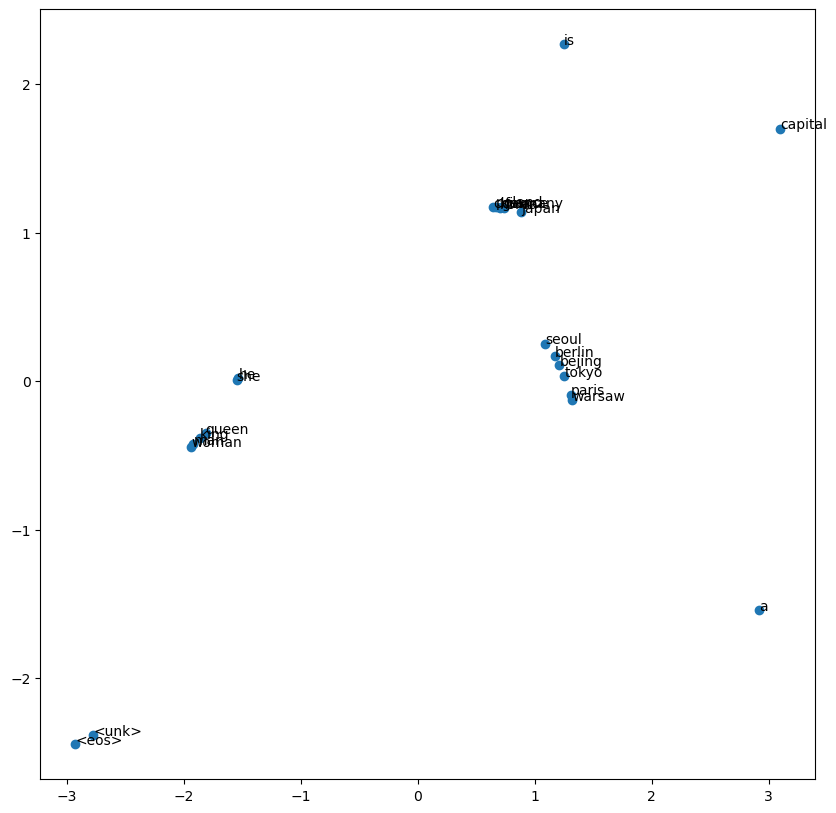

In [16]:
ano = vector_df['word'].values.tolist()
a = vector_df['x'].values.tolist()
b = vector_df['y'].values.tolist()

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(a,b)

for i in range(len(ano)) :
    ax.annotate(ano[i], (a[i], b[i]))

plt.show()

In [20]:
s1 = custom.cos_similarity( vector[word_dict['japan']], vector[word_dict['tokyo']] )
s2 = custom.cos_similarity( vector[word_dict['korea']], vector[word_dict['seoul']] )
s3 = custom.cos_similarity( vector[word_dict['germany']], vector[word_dict['berlin']] )
s4 = custom.cos_similarity( vector[word_dict['france']], vector[word_dict['paris']] )

print("s1 : {}".format(s1))
print("s2 : {}".format(s2))
print("s3 : {}".format(s3))
print("s4 : {}".format(s4))

s1 : 0.6350126317149435
s2 : 0.6964337555783128
s3 : 0.6361202444500749
s4 : 0.47584971955344096
